### 方法一，暴力递归法

In [1]:
import sys
sys.setrecursionlimit(1000)

n,k = list(map(int,input().split()))

def Process(n,k):
    if n == 0:
        return 0 
    if k == 1:
        return n 
    Min = 10**10 
    for i in range(1,n+1):
        Min = min(Min, max(Process(i-1, k-1), Process(n-i, k)))
    return Min + 1

def solution1(n,k):
    if n<1 or k<1:
        return 0
    return Process(n,k)

print(solution1(n,k))

3 2
2


In [2]:
[[0]*(2+1) for _ in range(2+1)]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

### 方法2，动态规划的方法 

In [12]:
import sys
sys.setrecursionlimit(1000)

n,k = list(map(int,input().split()))

def solution2(n,k_):
    if n<1 or k_ < 1:
        return 0
    if k_ == 1:
        return n 
    dp = [[0]*(k_+1) for _ in range(n+1)]
    for i in range(1,len(dp)):
        dp[i][1] = i 
    for i in range(1,len(dp)):
        for j in range(2,len(dp[0])):
            Min = 10**10 
            for k in range(1,i+1):
                Min = min(Min, max(dp[k-1][j-1], dp[i-k][j]))
            dp[i][j] = Min + 1
    return dp[n][k_] 

print(solution2(n,k))

3 2
2


###  方法3，节约空间

In [13]:
import sys
sys.setrecursionlimit(1000)

n,k = list(map(int,input().split()))

def solution3(n,k_):
    if n<1 or k_ < 1:
        return 0
    if k_ == 1:
        return n 
    preArr = [0] * (n+1)
    curArr = [0] * (n+1)
    for i in range(1,len(curArr)):
        curArr[i] = i 
    for i in range(1,k_):
        preArr, curArr = curArr, preArr 
        for j in range(1, len(curArr)):
            Min = 10**10 
            for k in range(1,j+1):
                Min = min(Min, max(preArr[k-1], curArr[j-k])) 
            curArr[j] = Min + 1 
    return curArr[len(curArr) - 1] 

print(solution3(n,k))

3 2
2


### 方法4，四边形不等式及其应用

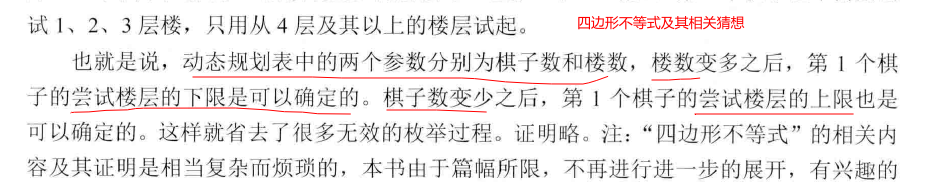

**代码参见书籍里面，这里略去**

### 方法5，最优解

In [14]:
n,k = list(map(int,input().split()))

def log2N(n):
    res = -1 
    while n!=0:
        res += 1 
        n = n // 2
    return res

def solution5(n,k):
    if n<1 or k < 1:
        return 0
    bsTimes = log2N(n) + 1  # n层楼，二分查找法可以这么多次可以找到。
    if k > bsTimes:
        return bsTimes 
    dp = [0] * k 
    res = 0 
    while True:
        res += 1
        pre = 0 
        for i in range(len(dp)):
            tmp = dp[i] 
            dp[i] = dp[i] + pre + 1  # 前一列对应dp[i] + 前一列上一行的数 pre + 1（当前楼层）
            pre = tmp 
            if dp[i] >= n:
                return res 
            
print(solution5(n,k))

200 5
8
